In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd

# IPC Depth Nums

## Importing
[to top](#Table-of-Contents) 

In [2]:
pwd

u'/Users/innovation-sfi/Dropbox/Research/Innovation/EPO/Data_processing/Python'

In [3]:
f_all_grants = '../Data_Play/IPC/ipc_code_list.csv'

In [4]:
df = pd.read_csv(f_all_grants, engine='c', header=None); df.head()
#dont need ID's

,0
0,A
1,A01
2,A01B
3,A01B0001000000
4,A01B0001020000


In [5]:
df['len'] = df.applymap(len)

In [6]:
grp = df.groupby('len')
nums = grp.size(); nums

len
1         8
3       130
4       639
14    73125
dtype: int64

In [7]:
s1 = grp.get_group(14); s1
s = s1.drop('len', axis=1); s

,0
3,A01B0001000000
4,A01B0001020000
5,A01B0001040000
6,A01B0001060000
7,A01B0001080000
8,A01B0001100000
9,A01B0001120000
10,A01B0001140000
11,A01B0001160000
12,A01B0001180000


In [8]:
s[s[0] == 'A01B0001000000']

,0
3,A01B0001000000


In [9]:
df_7 = s.applymap(lambda x: x[:8])
len(df_7[0].value_counts())

7434

In [10]:
depths = [1,3,4,8,14]
nums = []
for i in depths:
    dff = s.applymap(lambda x: x[:i])
    nums.append(len(dff[0].value_counts()))
print nums
print range(len(nums))

[8, 130, 639, 7434, 72586]
[0, 1, 2, 3, 4]


[8, 130, 639, 7434, 72586]
['A', 'A01', 'A01B', 'A01B 01', 'A01B 01/01']


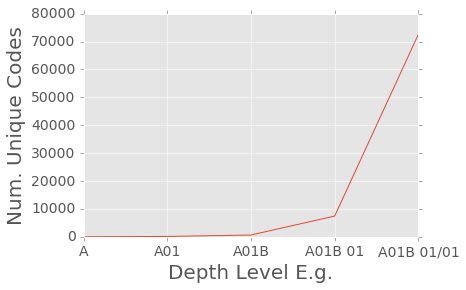

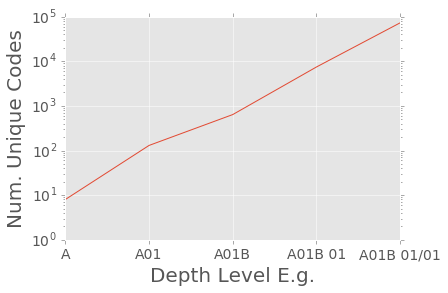

In [11]:
labels_cd = ['A', 'A01', 'A01B', 'A01B 01', 'A01B 01/01']
x = range(len(nums))

print nums
print labels_cd

plt.plot(x, nums)
plt.xticks(x, labels_cd, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Num. Unique Codes', fontsize=20)
plt.xlabel('Depth Level E.g.', fontsize=20)


plt.show()

plt.plot(x, nums)
ax = plt.gca()
ax.set_yscale('log')
plt.xticks(x, labels_cd, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Num. Unique Codes', fontsize=20)
plt.xlabel('Depth Level E.g.', fontsize=20)

plt.show()


Why we chose depth at A01B 01 - the Subclass level:
* Trying to get a workable resoultion
    * 639 would be too coarse/lossing too much information, whereares 72 thousand would be much too detailed to make the statistics inteligable
* Note, strictly speaking the actual group code is A01B 01/00 
    * The split is not denoted by string length but by 00 vs not 00. Splitting at '/' has the same result as filtering 00 vs not 00.
* Another reason for not using beyond Groups is that the further subgrouping is hierarchical but the information to build this hierarchy of subgroups isn't contained within the codes themselves, i.e not dependent upon the numbering or number of characters E.g:
    * Code G01N 33/487 is the supergroup of G01N 33/49. See IPC guide page 7 for explication and examples.
        * [http://www.wipo.int/export/sites/www/classifications/ipc/en/guide/guide_ipc.pdf]

Notes on CPC:
* (Generally) only a further detailing of the IPC system, i.e only adds further levels of detail to the codes without changing any of the structure examples http://www.cooperativepatentclassification.org/cpc/scheme/A/scheme-A01B.pdf
    * So truncating CPCs turns them into IPC codes
    * Counter example see WARNING in http://www.cooperativepatentclassification.org/cpc/scheme/A/scheme-A01B.pdf
    * We should ask the US guys how far up the hierarchy this can occur - if only at the subgroup level then it wont effect as we truncate to groups